# Load the CSV file into a Pandas DataFrame

In [1]:
import pandas as pd
from scipy.stats import pearsonr
from scipy.stats import spearmanr

import matplotlib.pyplot as plt
import numpy as np
threshold=1
org = pd.read_csv("train.csv")

In [2]:
dath_path = "E:\\Research work\\assessment checker research\\learning-agency-lab-automated-essay-scoring-2\\"

In [3]:
import os
current_dir = os.getcwd()
print(f"Current working directory: {current_dir}")

Current working directory: e:\Research work\assessment checker research\learning-agency-lab-automated-essay-scoring-2


In [4]:
df_results = pd.DataFrame(columns=['No.Instances','Mean', 'Min', 'Max', 'No.Instances_gemini','Mean_gemini', 'Min_gemini', 'Max_gemini' ])
# Loop over each CSV file and read the DataFrame from the file

df_org = org
df_gemini = pd.read_csv("results_gemini/Holistic_assessment_results_by_rubric.csv")


In [5]:
score_org = df_org[['score']]
score_gemini = df_gemini[['Score_gemini']]    
# Calculate the mean, max, and count
min = score_org.min()[0]
mean = score_org.mean()[0].round(2)
max = score_org.max()[0]
count = score_org.count()[0]
min1 = score_gemini.min()[0]
mean1 = score_gemini.mean()[0].round(2)
max1 = score_gemini.max()[0]
count1 = score_gemini.count()[0]
# Add the results to the DataFrame
df_results.loc["Holistic"] = [count,mean, min, max, count1,mean1, min1, max1]
df_results.to_csv("reports_graph_Gemini/Report for EssaySets.csv", index=False)
df_results.to_excel("reports_graph_Gemini/Report for EssaySets.xlsx", index=False)
# Print the results
df_results.head(8)

C:\Users\Nimra\AppData\Local\Temp\ipykernel_16760\25835020.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  min = score_org.min()[0]
C:\Users\Nimra\AppData\Local\Temp\ipykernel_16760\25835020.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  mean = score_org.mean()[0].round(2)
C:\Users\Nimra\AppData\Local\Temp\ipykernel_16760\25835020.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  max = score_org.max()[0]
C:\Users\Nimra\Ap

,No.Instances,Mean,Min,Max,No.Instances_gemini,Mean_gemini,Min_gemini,Max_gemini
Holistic,17307.0,2.95,1.0,6.0,5074.0,2.96,1.0,5.0


# print deviations

In [6]:
# Ensure the necessary column exists and handle missing values
if 'Score_gemini' in df_gemini.columns:
    df_gemini.dropna(subset=['Score_gemini'], inplace=True)
    
    # Calculate the difference between the actual and predicted scores
    df_gemini['Difference'] = abs(df_gemini['score'] - df_gemini['Score_gemini'])
    print(f"The dataset has {len(df_gemini['Difference'])} instances")
    
    # Filter the DataFrame to only include rows where the difference is greater than the threshold
    deviations = df_gemini[df_gemini['Difference'] > threshold]
    print("\t" + str(round(len(deviations) / len(df_gemini) * 100)) + "% of results are deviating and the count is: " + str(len(deviations)))
    
    # Save the rows where the difference is greater than the threshold to a CSV file
    deviations.to_csv("reports_graph_Gemini/Deviations.csv", index=False)
else:
    print(f"The column 'Score_gemini' does not exist in the dataset.")

The dataset has 5074 instances
	9% of results are deviating and the count is: 465


# Plot pie graphs

In [7]:
# Define a function that creates a pie chart of essay scores and returns the subplot
def create_pie_chart(title, scores, graph_path):
    # Create a figure with three subplots
    cmap_actual = plt.get_cmap('Pastel1')
    counts = scores.value_counts()
    labels = counts.index
    # labels = ['4', '3', '2', '1']
    values = counts.values
    explode = [0.2 if c < 20 else 0 for c in values]
    cmap_actual = plt.get_cmap('Pastel1')
    plt.figure(figsize=(5,4))
    plt.pie(values, labels=labels, autopct='%1.1f%%', explode=explode, colors=cmap_actual(range(len(labels))),
                              shadow = True, 
                              wedgeprops={'linewidth': 0.5, 'edgecolor': 'white'},
       textprops={'size': 12})
    plt.title(title,fontsize=10)
    plt.legend()
    plt.axis('equal')
    plt.legend()
    # Adjust the plot layout to prevent labels from overlapping with the border
    plt.tight_layout()
    plt.savefig(graph_path+"line.png")
    plt.show()

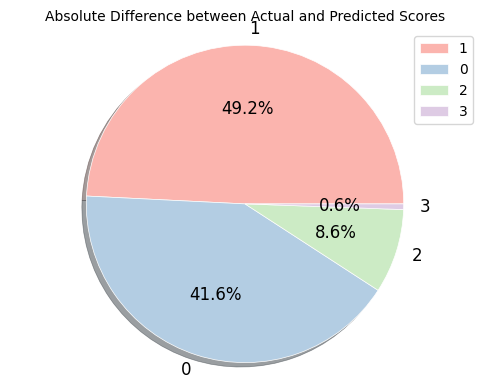

In [8]:
# Ensure the necessary columns exist and handle missing values
if 'Score_gemini' in df_gemini.columns and 'score' in df_gemini.columns:
    df_gemini.dropna(subset=['Score_gemini', 'score'], inplace=True)
    
    # Convert scores to integers
    actual_scores = df_gemini['score'].astype(int)
    predicted_scores = df_gemini['Score_gemini'].astype(int)
    
    # Modify predicted scores based on given condition
    m_predicted_scores = [score // 4 if score > 6 else score for score in predicted_scores]
    
    # Calculate the absolute difference
    difference = abs(actual_scores - m_predicted_scores)
    
    # Define the title and path for the graph
    title = "Absolute Difference between Actual and Predicted Scores"
    graph_path = "reports_graph_Gemini/Pie_Absolute_Difference_Scores_"
    
    # Create the pie chart
    create_pie_chart(title, difference, graph_path=graph_path)
else:
    print(f"The necessary columns 'Score_gemini' and/or 'score' do not exist in the dataset.")


# Plot Subgraphs

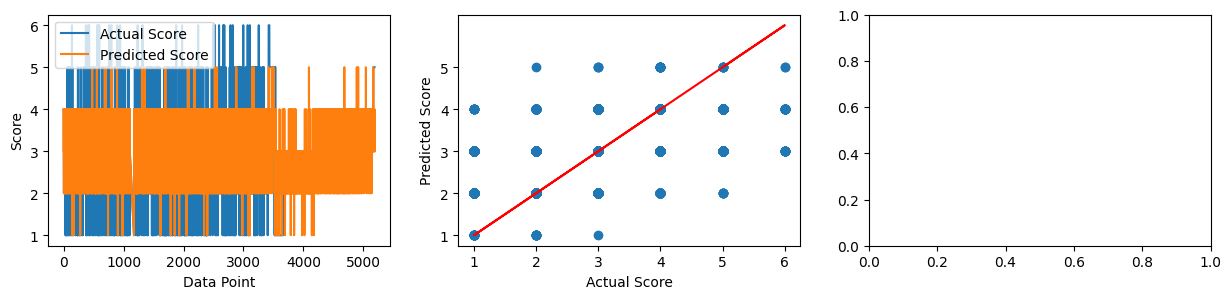

In [9]:
import matplotlib.pyplot as plt

# Ensure the necessary columns exist and handle missing values
if 'score' in df_gemini.columns and 'Score_gemini' in df_gemini.columns:
    df_gemini.dropna(subset=['Score_gemini', 'score'], inplace=True)
    
    actual_scores = df_gemini['score']
    predicted_scores = df_gemini['Score_gemini']
    difference = abs(actual_scores - predicted_scores)

    # Define the title and path for the graph
    title = f"Actual vs Predicted Scores: Range {int(actual_scores.min())} - {int(actual_scores.max())}"
    graph_path = "reports_graph_Gemini/Actual_vs_Predicted_Scores_"
    
    # Create a figure with three subplots
    fig, axs = plt.subplots(1, 3, figsize=(15, 3))
    
    # Plot the actual scores and predicted scores in the first subplot
    axs[0].plot(actual_scores, label='Actual Score')
    axs[0].plot(predicted_scores, label='Predicted Score')
    axs[0].set_xlabel('Data Point')
    axs[0].set_ylabel('Score')
    axs[0].set_yticks(range(int(actual_scores.min()), int(actual_scores.max() + 1)))
    axs[0].legend()
    
    # Scatter plot of actual vs. predicted scores in the second subplot
    axs[1].scatter(actual_scores, predicted_scores)
    axs[1].plot(actual_scores, actual_scores, color='red')
    axs[1].set_xlabel('Actual Score')
    axs[1].set_xticks(range(int(actual_scores.min()), int(actual_scores.max() + 1)))
    axs[1].set_ylabel('Predicted Score')
    axs[1].set_yticks(range(int(predicted_scores.min()), int(predicted_scores.max() + 1)))
    
 


# Code for Pearson and Spearman's rank

In [10]:
# Code for Graph plot
def plot_pearson(actual_scores, predicted_scores, title, graph_path):
    corr, pval = pearsonr(actual_scores, predicted_scores)
    # Assuming actual_scores and predicted_scores are NumPy arrays or Python lists containing the actual and predicted scores, respectively
    scorr, spval = spearmanr(actual_scores, predicted_scores)
    print(f"Spearman's rank correlation coefficient: {scorr:.2f}")
    # print the correlation coefficient and p-value
    print("Pearson correlation coefficient: {:.2f}".format(corr))
    print("p-value: {:.3f}".format(pval))

    # plot the data and the linear regression line
    plt.figure(figsize=(5,4))
    plt.tight_layout()
    plt.scatter(actual_scores, predicted_scores)
    plt.plot(actual_scores, actual_scores, color='red')
    plt.title(f"{title}, Pearson correlation coefficient= {corr:.2f}", fontsize=10)
    plt.xlabel('Actual Score')
    plt.xticks(range(int(actual_scores.min()), int(actual_scores.max()+1)))
    plt.ylabel('Predicted Score')
    plt.yticks(range(int(predicted_scores.min()), int(predicted_scores.max()+1)))
    # plt.figure(figsize=(8,3))
    plt.savefig(graph_path+"pearson.png")
    # Display the plot
    plt.show()


## Graphs using loop

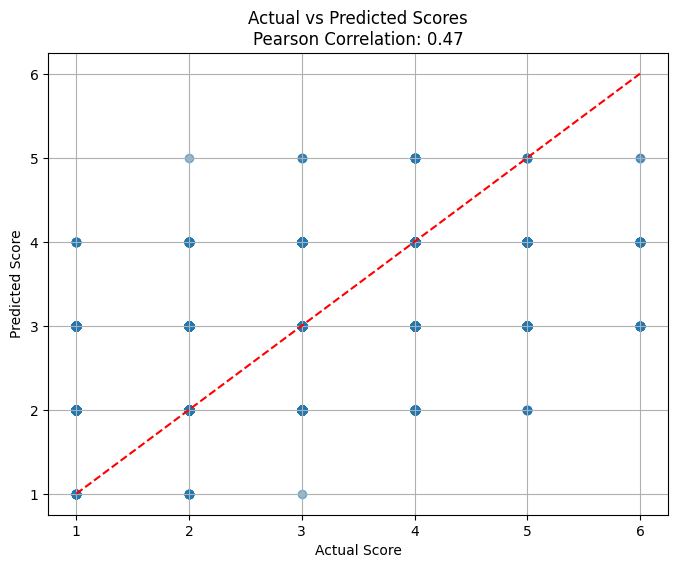

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# Define a function to plot Pearson correlation
def plot_pearson(actual_scores, predicted_scores, title, graph_path):
    # Calculate Pearson correlation coefficient
    correlation, _ = pearsonr(actual_scores, predicted_scores)
    
    # Create a scatter plot
    plt.figure(figsize=(8, 6))
    plt.scatter(actual_scores, predicted_scores, alpha=0.5)
    plt.plot(range(1, 7), range(1, 7), color='red', linestyle='--')
    plt.xlabel('Actual Score')
    plt.ylabel('Predicted Score')
    plt.title(f"{title}\nPearson Correlation: {correlation:.2f}")
    plt.xticks(range(1, 7))
    plt.yticks(range(1, 7))
    plt.grid(True)
    plt.savefig(graph_path + ".png", bbox_inches='tight')
    plt.show()

# Ensure the necessary columns exist and handle missing values
if 'score' in df_gemini.columns and 'Score_gemini' in df_gemini.columns:
    df_gemini.dropna(subset=['Score_gemini', 'score'], inplace=True)
    
    # Ensure scores are integers between 1 and 6
    actual_scores = df_gemini['score'].astype(int)
    predicted_scores = df_gemini['Score_gemini'].astype(int)
    
    # Filter scores to be within the valid range [1, 6]
    valid_range = (actual_scores >= 1) & (actual_scores <= 6) & (predicted_scores >= 1) & (predicted_scores <= 6)
    actual_scores = actual_scores[valid_range]
    predicted_scores = predicted_scores[valid_range]
    
    # Define the title and path for the graph
    title = "Actual vs Predicted Scores"
    graph_path = "reports_graph_Gemini/Actual_vs_Predicted_Scores_"
    
    # Create a scatter plot of the actual vs predicted scores
    plot_pearson(actual_scores, predicted_scores, title, graph_path)
else:
    print(f"The necessary columns 'score' and/or 'Score_gemini' do not exist in the dataset.")


# code RMSE graph

In [12]:
def plot_rmse(actual_scores, predicted_scores, title, graph_path):
    # Calculate RMSE
    rmse = np.sqrt(np.mean((np.array(predicted_scores) - np.array(actual_scores))**2))
    plt.figure(figsize=(5,4))
    # Create scatter plot
    plt.scatter(actual_scores, predicted_scores, color='blue')

    # Add diagonal line of perfect prediction
    plt.plot([0, 5], [0, 5], color='red')

    # Add RMSE line
    plt.axhline(y=rmse, color='green')

    # Add labels and title
    plt.xlabel('Actual Scores')
    plt.xticks(range(int(actual_scores.min()), int(actual_scores.max()+1)))
    plt.yticks(range(int(predicted_scores.min()), int(predicted_scores.max()+1)))
    # plt.figure(figsize=(8,3))
    plt.ylabel('Predicted Scores')
    plt.title(f'{title}, RMSE = {rmse:.2f}', fontsize=10)
    plt.savefig(graph_path+"rmse.png")

    # Show plot
    plt.show()

## Graphs using loop

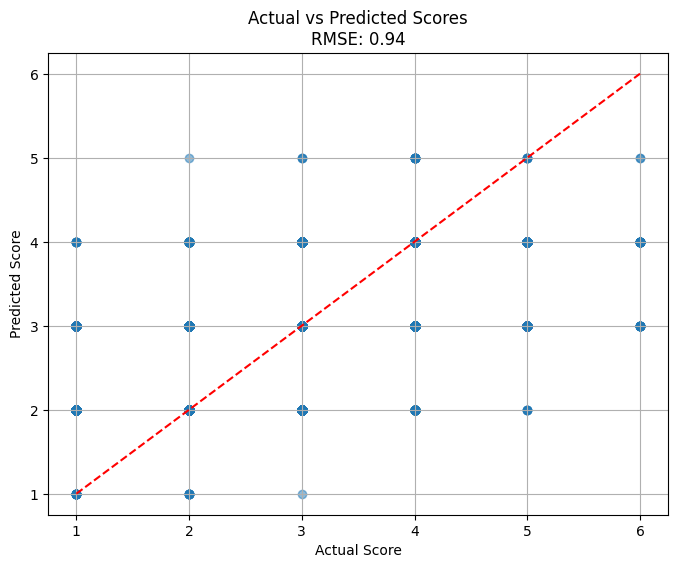

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Define a function to calculate RMSE and plot the scores
def plot_rmse(actual_scores, predicted_scores, title, graph_path):
    # Calculate Root Mean Squared Error (RMSE)
    rmse = np.sqrt(np.mean((actual_scores - predicted_scores) ** 2))
    
    # Create a scatter plot
    plt.figure(figsize=(8, 6))
    plt.scatter(actual_scores, predicted_scores, alpha=0.5)
    plt.plot(range(1, 7), range(1, 7), color='red', linestyle='--')
    plt.xlabel('Actual Score')
    plt.ylabel('Predicted Score')
    plt.title(f"{title}\nRMSE: {rmse:.2f}")
    plt.xticks(range(1, 7))
    plt.yticks(range(1, 7))
    plt.grid(True)
    plt.savefig(graph_path + ".png", bbox_inches='tight')
    plt.show()

# Ensure the necessary columns exist and handle missing values
if 'score' in df_gemini.columns and 'Score_gemini' in df_gemini.columns:
    df_gemini.dropna(subset=['Score_gemini', 'score'], inplace=True)
    
    # Ensure scores are integers between 1 and 6
    actual_scores = df_gemini['score'].astype(int)
    predicted_scores = df_gemini['Score_gemini'].astype(int)
    
    # Filter scores to be within the valid range [1, 6]
    valid_range = (actual_scores >= 1) & (actual_scores <= 6) & (predicted_scores >= 1) & (predicted_scores <= 6)
    actual_scores = actual_scores[valid_range]
    predicted_scores = predicted_scores[valid_range]
    
    # Define the title and path for the graph
    title = "Actual vs Predicted Scores"
    graph_path = "reports_graph_Gemini/Actual_vs_Predicted_Scores_"
    
    # Create a scatter plot of the actual vs predicted scores
    plot_rmse(actual_scores, predicted_scores, title, graph_path)
else:
    print(f"The necessary columns 'score' and/or 'Score_gemini' do not exist in the dataset.")


# Code for Box plot

In [14]:
def plot_box(actual_scores, predicted_scores, title, graph_path):
    plt.figure(figsize=(5,4))
    # Create a box plot for the scores
    plt.boxplot([actual_scores, predicted_scores], labels=['Actual', 'Predicted'])

    # Label the axes and add a title
    plt.xlabel('Scores')
    plt.ylabel('Score Scale')
    plt.title(title , fontsize=10)

    # Display the plot
    plt.show()


C:\Users\Nimra\AppData\Local\Temp\ipykernel_16760\4032318335.py:7: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([actual_scores, predicted_scores], labels=['Actual Score', 'Predicted Score'])


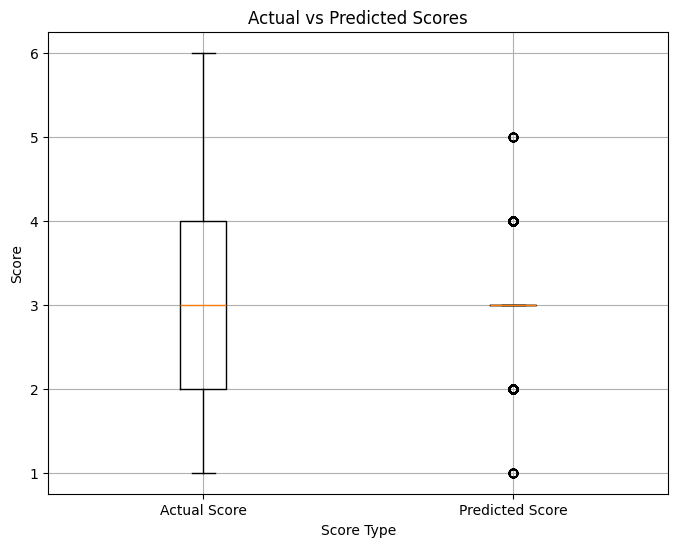

In [15]:
import matplotlib.pyplot as plt

# Define a function to plot box plots
def plot_box(actual_scores, predicted_scores, title, graph_path):
    # Create a box plot
    plt.figure(figsize=(8, 6))
    plt.boxplot([actual_scores, predicted_scores], labels=['Actual Score', 'Predicted Score'])
    plt.xlabel('Score Type')
    plt.ylabel('Score')
    plt.title(title)
    plt.grid(True)
    plt.savefig(graph_path + ".png", bbox_inches='tight')
    plt.show()

# Ensure the necessary columns exist and handle missing values
if 'score' in df_gemini.columns and 'Score_gemini' in df_gemini.columns:
    df_gemini.dropna(subset=['Score_gemini', 'score'], inplace=True)
    
    # Ensure scores are integers between 1 and 6
    actual_scores = df_gemini['score'].astype(int)
    predicted_scores = df_gemini['Score_gemini'].astype(int)
    
    # Filter scores to be within the valid range [1, 6]
    valid_range = (actual_scores >= 1) & (actual_scores <= 6) & (predicted_scores >= 1) & (predicted_scores <= 6)
    actual_scores = actual_scores[valid_range]
    predicted_scores = predicted_scores[valid_range]
    
    # Define the title and path for the graph
    title = "Actual vs Predicted Scores"
    graph_path = "reports_graph_Gemini/Actual_vs_Predicted_Scores_"
    
    # Create a box plot
    plot_box(actual_scores, predicted_scores, title, graph_path)
else:
    print(f"The necessary columns 'score' and/or 'Score_gemini' do not exist in the dataset.")


# Other Graphs

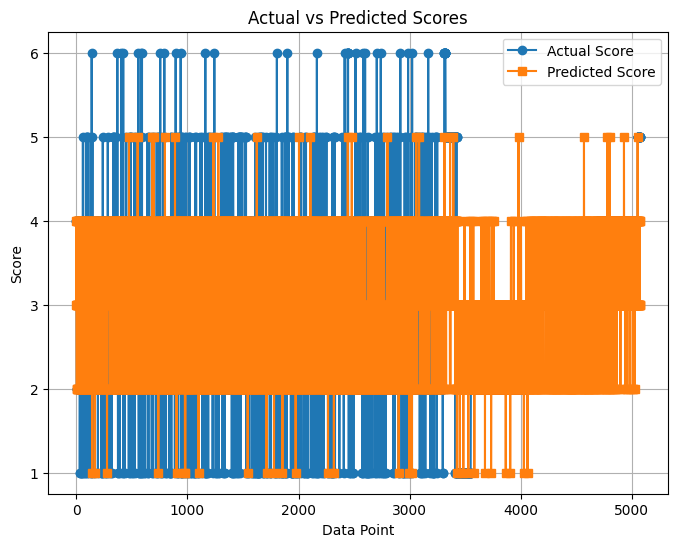

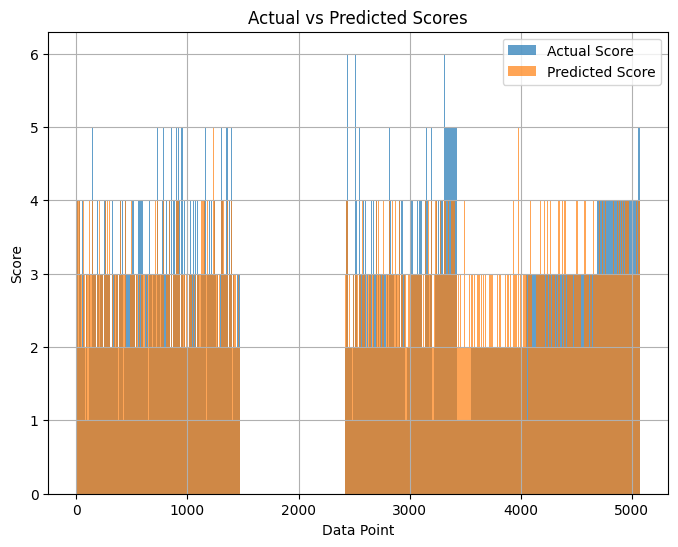

In [16]:
import matplotlib.pyplot as plt

# Define a function to plot line plots
def plot_line(actual_scores, predicted_scores, title, graph_path):
    # Create a line plot
    plt.figure(figsize=(8, 6))
    plt.plot(range(len(actual_scores)), actual_scores, label='Actual Score', marker='o')
    plt.plot(range(len(predicted_scores)), predicted_scores, label='Predicted Score', marker='s')
    plt.xlabel('Data Point')
    plt.ylabel('Score')
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.savefig(graph_path + "_line.png", bbox_inches='tight')
    plt.show()

# Define a function to plot bar plots
def plot_bar(actual_scores, predicted_scores, title, graph_path):
    # Create a bar plot
    plt.figure(figsize=(8, 6))
    plt.bar(range(len(actual_scores)), actual_scores, alpha=0.7, label='Actual Score')
    plt.bar(range(len(predicted_scores)), predicted_scores, alpha=0.7, label='Predicted Score')
    plt.xlabel('Data Point')
    plt.ylabel('Score')
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.savefig(graph_path + "_bar.png", bbox_inches='tight')
    plt.show()

# Ensure the necessary columns exist and handle missing values
if 'score' in df_gemini.columns and 'Score_gemini' in df_gemini.columns:
    df_gemini.dropna(subset=['Score_gemini', 'score'], inplace=True)
    
    # Ensure scores are integers between 1 and 6
    actual_scores = df_gemini['score'].astype(int)
    predicted_scores = df_gemini['Score_gemini'].astype(int)
    
    # Filter scores to be within the valid range [1, 6]
    valid_range = (actual_scores >= 1) & (actual_scores <= 6) & (predicted_scores >= 1) & (predicted_scores <= 6)
    actual_scores = actual_scores[valid_range]
    predicted_scores = predicted_scores[valid_range]
    
    # Define the title and path for the graphs
    title = "Actual vs Predicted Scores"
    graph_path = "reports_graph_Gemini/Actual_vs_Predicted_Scores"
    
    # Create line and bar plots
    plot_line(actual_scores, predicted_scores, title, graph_path)
    plot_bar(actual_scores, predicted_scores, title, graph_path)
else:
    print(f"The necessary columns 'score' and/or 'Score_gemini' do not exist in the dataset.")
